## Go Pokemon

- Introduction of the data



In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import sklearn
import seaborn as sns
import math
import scipy.stats as sc

- explain why we add total to our column.

In [3]:
Pokemon = pd.read_csv("./pokemon.csv")

Pokemon["total"] = (Pokemon["sp_attack"] +
                 Pokemon["sp_defense"] +
                 Pokemon["hp"] +
                 Pokemon["speed"]+
                 Pokemon["attack"]+
                 Pokemon["defense"])
Pokemon.head()

#this is origin dataset from Kaggle

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,total
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,318
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,405
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,625
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,309
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,405


- We listed hypothesis for some questions floated in our mind...
1. What are the Pokemon stat differences/ trends from each generation? 

   Our hypothesis: We think there is a stat inflation in each newer generation (newer pokemon genertaion is better than the old pokemon generation ) 

   Lets see what is going on ...

In [27]:
Pokemon_generation = Pokemon.set_index(["generation"])
Pokemon_generation
generation=Pokemon_generation[Pokemon_generation.columns[33:39]]
generation

#Pokemon_generation.plot(y='speed', use_index=True)


,sp_attack,sp_defense,speed,type1,type2,weight_kg
generation,,,,,,
1,65,65,45,grass,poison,6.9
1,80,80,60,grass,poison,13.0
1,122,120,80,grass,poison,100.0
1,60,50,65,fire,NaN,8.5
1,80,65,80,fire,NaN,19.0
...,...,...,...,...,...,...
7,107,101,61,steel,flying,999.9
7,59,31,109,grass,steel,0.1
7,97,53,43,dark,dragon,888.0


In [5]:
generation.describe()

,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,is_legendary,total
count,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,0.087391,428.377029
std,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,0.282583,119.203577
min,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,0.000000,180.000000
25%,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,0.000000,320.000000
50%,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,0.000000,435.000000
75%,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,0.000000,505.000000
max,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,1.000000,780.000000


<AxesSubplot:xlabel='generation'>

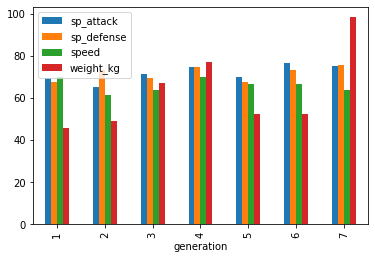

In [23]:
p1=generation.groupby(pd.Grouper(level="generation")).mean()
p1.plot.bar()

Explaination: (editing in progress)

In [7]:
Pokemon["total"] = (Pokemon["sp_attack"] +
                 Pokemon["sp_defense"] +
                 Pokemon["hp"] +
                 Pokemon["speed"]+
                 Pokemon["attack"]+
                 Pokemon["defense"])

2. What are the key differences between a pokemon type and stats? 

   We assumed that Pokemon which has more than one type has higher total stats(hp, speed, attack..etc)
   We will attempt to establish a theme of pokemon type and their distribution of stats.

In [46]:
# First, groupby type1 and type 2 "in each generation"
# code

ok=Pokemon.fillna(0)
gen1 = ok[ok['generation'] == 1]
#data = gen1.set_index(["type1"])
#Pokemon_type1=pd.DataFrame(data)


onlytype1=gen1[gen1['type2'] == 0]

onlytype2=gen1[gen1['type2'] != 0]

print(onlytype1.total.describe())
print(onlytype2.total.describe())
#------- Gen 2 

gen2 = ok[ok['generation'] == 2]
data = gen2.set_index(["type1"])
Pokemon_type1=pd.DataFrame(data)


onlytype1for2=gen2[gen2['type2'] == 0]

onlytype2for2=gen2[gen2['type2'] != 0]

print(onlytype1for2.ba.describe())
print(onlytype2for2.total.describe())








count     70.000000
mean     407.600000
std      113.019865
min      195.000000
25%      320.000000
50%      402.500000
75%      490.000000
max      780.000000
Name: total, dtype: float64
count     81.000000
mean     423.728395
std      111.784280
min      195.000000
25%      325.000000
50%      435.000000
75%      500.000000
max      640.000000
Name: total, dtype: float64
count     51.000000
mean     400.470588
std      115.588988
min      180.000000
25%      311.500000
50%      405.000000
75%      500.000000
max      610.000000
Name: total, dtype: float64
count     49.000000
mean     426.408163
std      125.741620
min      210.000000
25%      330.000000
50%      430.000000
75%      485.000000
max      700.000000
Name: total, dtype: float64


In [9]:
edata=generation.fillna(0)
allgentype1=edata[edata['type2'] == 0]
allgentype2= edata[edata['type2'] != 0]

print(allgentype2.total.describe())
print(allgentype1.total.describe())
print(edata.total.describe())






count    417.000000
mean     445.894484
std      119.354125
min      190.000000
25%      340.000000
50%      464.000000
75%      520.000000
max      780.000000
Name: total, dtype: float64
count    384.000000
mean     409.354167
std      116.235399
min      180.000000
25%      310.000000
50%      405.000000
75%      495.000000
max      780.000000
Name: total, dtype: float64
count    801.000000
mean     428.377029
std      119.203577
min      180.000000
25%      320.000000
50%      435.000000
75%      505.000000
max      780.000000
Name: total, dtype: float64


<AxesSubplot:xlabel='type1'>

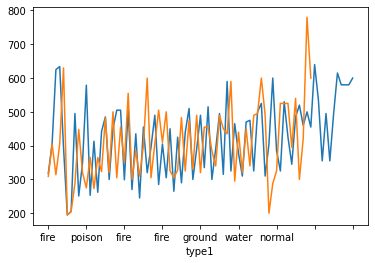

In [32]:
#plot pie(or Line) chart of the only one type

onlytype2.total.plot()
onlytype1.total.plot()



In [47]:
#then compare 

print(sc.stats.ttest_ind(onlytype1.total,onlytype2.total))
sc.stats.ttest_ind(allgentype1.total,allgentype2.total)

Ttest_indResult(statistic=-0.8796089051707912, pvalue=0.38048763695778676)


Ttest_indResult(statistic=-4.383170789740527, pvalue=1.3258212170067869e-05)

In [12]:
 #additional part 
# two types charachters increased by each generation?
type_gen=generation.groupby("generation")["type1","type2"].count()
type_gen

C:\Users\Arham\AppData\Local\Temp/ipykernel_119848/4236321937.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  type_gen=generation.groupby("generation")["type1","type2"].count()


,type1,type2
generation,,
1,151,81
2,100,49
3,135,66
4,107,54
5,156,75
6,72,41
7,80,51


<AxesSubplot:xlabel='generation'>

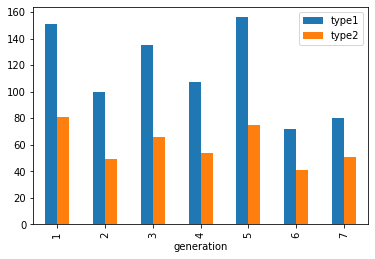

In [13]:
type_gen.plot.bar(subplots=False)

3. Linear model with different stats to do projection of same function (eg. we choose attack/defense) 

   Now we already figured out how the types affect Pokemon performance in each generation. 
   We try to predict the eighth generation (already exist tho) whether their percentage of attack increase.

In [71]:
# Before predicting, lets see what's the relationship between attack% and generation
# calculate the percentage distribution (ex: sp_attack/total) for each generation 

#adding a new column called "total"


df=pd.DataFrame(Pokemon).fillna(0)

df

X_L = df.drop(columns=['pokedex_number','name','type1', 'type2','is_legendary','abilities','against_bug','against_dark','against_dragon',	'against_electric',	'against_fairy',	'against_fight',	'against_fire',	'against_flying',	'against_ghost','generation','japanese_name','against_grass',	'against_ground',	'against_ice',	'against_normal',	'against_poison',	'against_psychic',	'against_rock',	'against_steel'
, 'against_water','base_egg_steps','base_happiness','capture_rate','experience_growth','percentage_male','classfication','total'])
Y_L = df["is_legendary"]

X_L


,attack,base_total,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg
0,49,318,49,0.7,45,65,65,45,6.9
1,62,405,63,1.0,60,80,80,60,13.0
2,100,625,123,2.0,80,122,120,80,100.0
3,52,309,43,0.6,39,60,50,65,8.5
4,64,405,58,1.1,58,80,65,80,19.0
...,...,...,...,...,...,...,...,...,...
796,101,570,103,9.2,97,107,101,61,999.9
797,181,570,131,0.3,59,59,31,109,0.1
798,101,570,53,5.5,223,97,53,43,888.0
799,107,600,101,2.4,97,127,89,79,230.0


In [72]:
from sklearn.model_selection import train_test_split

#Train test split 
X_train, X_test, y_train,y_test = train_test_split(X_L.values,Y_L.values)
print("Successful Split")



Successful Split


In [79]:
from sklearn.ensemble import RandomForestClassifier as RF
#Create Model 

clf = RF(bootstrap=True)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

clf.predict(np.array([[120,600,75,3,88,100,75,142,50]]))[0] == 1

True

<AxesSubplot:xlabel='generation', ylabel='total'>

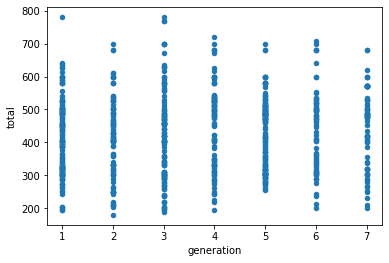

In [15]:
# make line or scatter plot in one graph 
Pokemon.plot.scatter('generation', 'total', s=None, c=None)

In [16]:
# use simple linear regression to predict the eight gen

from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)

Pokemon[["name","sp_attack","sp_defense","total"]].head()


,name,sp_attack,sp_defense,total
0,Bulbasaur,65,65,318
1,Ivysaur,80,80,405
2,Venusaur,122,120,625
3,Charmander,60,50,309
4,Charmeleon,80,65,405


In [17]:
# web scrap and create the 8th generation dataset + explain

In [18]:
# compare our linear regression outcome and the actual outcome. Ex: Lasso regression is more accurate(?